# 数据获取

In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


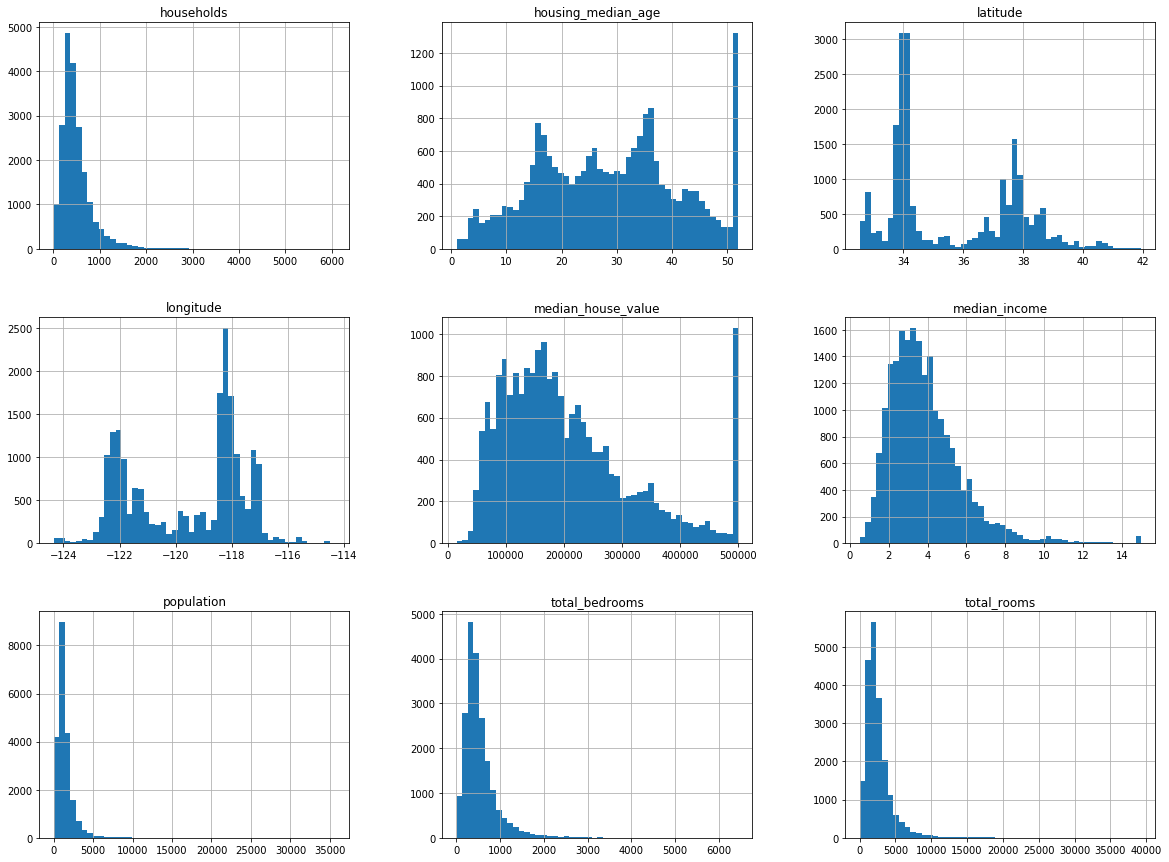

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indice = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indice = shuffled_indice[:test_set_size]
    train_indices = shuffled_indice[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indice]
train_set, test_set = split_train_test(housing, 0.2)

In [9]:
print(len(test_set))
print(len(train_set))

4128
16512


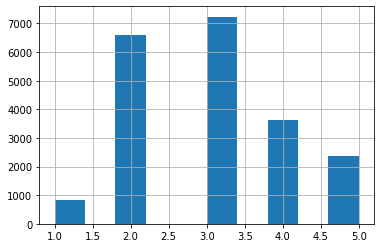

In [10]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [13]:
20640*0.2 ==1447+1316+728+473+164

True

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

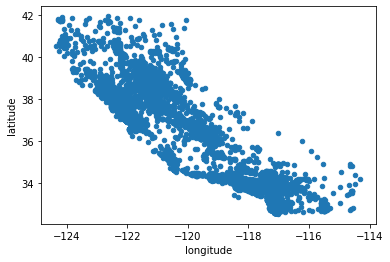

In [15]:
housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude')

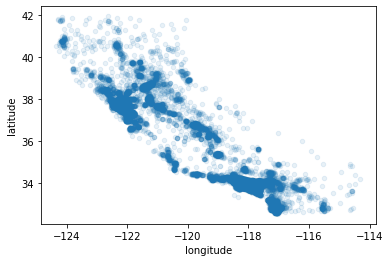

In [16]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

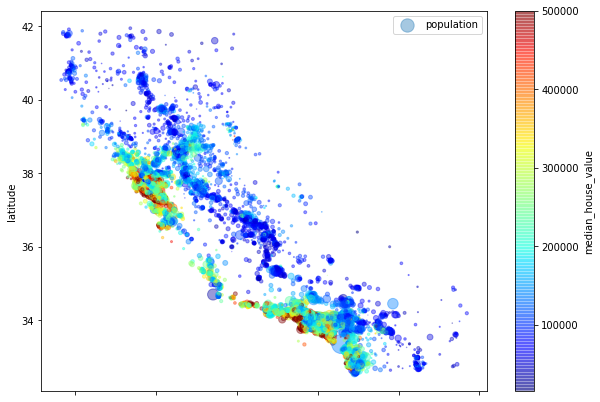

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,)
plt.legend()

# 相关矩阵

In [18]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4D3DC0508>,
      dtype=object)

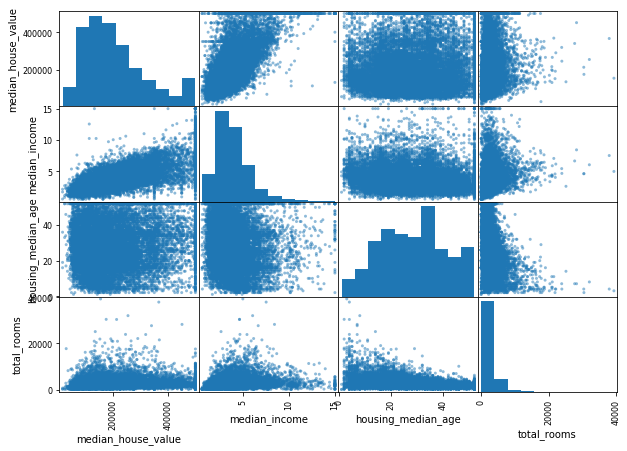

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms']
scatter_matrix(housing[attributes], figsize=(10, 7))

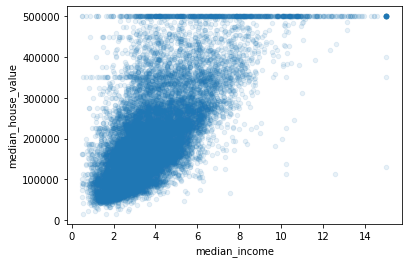

In [20]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

# 数值型变量的组合变换

In [21]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['poplation_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687160
rooms_per_household        0.146285
total_rooms                0.135097
housing_median_age         0.114110
households                 0.064506
total_bedrooms             0.047689
poplation_per_household   -0.021985
population                -0.026920
longitude                 -0.047432
latitude                  -0.142724
bedrooms_per_room         -0.259984
Name: median_house_value, dtype: float64

In [22]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# 缺失值的替换

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# 分类变量 的处理

In [24]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_1hot = cat_encoder.fit_transform(housing_cat)
housing_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# 通过sklearn的基类构造 变量组合 的类，以及构建完整的pipeline

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_per_room=True):
        self.add_bedroom_per_room = add_bedroom_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedroom_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
        
attr_adder = CombinedAttributeAdder(add_bedroom_per_room=False)
housing_extr_attribs = attr_adder.transform(housing.values)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),('attribs_adder', CombinedAttributeAdder()), ('Scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [28]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', OneHotEncoder(), cat_attribs)])

housing_pre = full_pipeline.fit_transform(housing)

# 以上内容通过构建full_pipeline实现了对数据的清洗整理

# 以下内容便利用housing_pre以及不同算法进行回归分析

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
line_model = LinearRegression()
line_model.fit(housing_pre, housing_labels)
mse = mean_squared_error(line_model.predict(housing_pre), housing_labels)
print(np.sqrt(mse))

68628.19819848923


In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_pre, housing_labels)
mse_tree = mean_squared_error(dtr.predict(housing_pre), housing_labels)
print(np.sqrt(mse_tree))

0.0


In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(housing_pre, housing_labels)
mse_rfr = mean_squared_error(rfr.predict(housing_pre), housing_labels)
print(np.sqrt(mse_rfr))

18674.944243505473


# 交叉验证

In [52]:
from sklearn.model_selection import cross_val_score
scores_tree = cross_val_score(dtr, housing_pre, housing_labels, scoring='neg_mean_squared_error', cv=10)

def score_show(score):
    score = np.sqrt(-score)
    print("score={}\n".format(score))
    print("score_mean={}\n".format(score.mean()))
    print("score_std={}\n".format(score.std()))
    
score_show(scores_tree)

score=[69085.97584455 67345.51694859 69385.44930636 69540.82732183
 71505.8113384  75663.31963147 70933.72494366 70812.69835287
 76866.71137774 71079.81144258]

score_mean=71221.98465080533

score_std=2787.9824869833096



In [53]:
score_linear = cross_val_score(line_model, housing_pre, housing_labels, scoring='neg_mean_squared_error', cv=10)
score_show(score_linear)

score=[66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]

score_mean=69052.46136345083

score_std=2731.67400179835



In [57]:
score_rfr = cross_val_score(rfr, housing_pre, housing_labels, scoring='neg_mean_squared_error', cv=10)
score_show(score_rfr)

score=[49480.24795759 47463.08085228 49640.7283013  52516.98408546
 49386.3060688  53558.23334348 48862.97530256 48047.57462539
 53382.566207   50379.45793627]

score_mean=50271.815468012464

score_std=2053.2833887485376



# 参数优化选择

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8, 10]}, {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4,]}]

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_pre, housing_labels)

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-mean_score), params)
grid_search.best_params_

63970.573011589986 {'max_features': 2, 'n_estimators': 3}
55638.5567708628 {'max_features': 2, 'n_estimators': 10}
52889.70815624211 {'max_features': 2, 'n_estimators': 30}
60590.97161850814 {'max_features': 4, 'n_estimators': 3}
53194.6585937951 {'max_features': 4, 'n_estimators': 10}
50011.5276377548 {'max_features': 4, 'n_estimators': 30}
58284.81608097135 {'max_features': 6, 'n_estimators': 3}
52023.81676277172 {'max_features': 6, 'n_estimators': 10}
49864.65337803923 {'max_features': 6, 'n_estimators': 30}
58408.007405362696 {'max_features': 8, 'n_estimators': 3}
51928.284447933875 {'max_features': 8, 'n_estimators': 10}
49902.36748490334 {'max_features': 8, 'n_estimators': 30}
58820.86727483306 {'max_features': 10, 'n_estimators': 3}
52598.8998994589 {'max_features': 10, 'n_estimators': 10}
50276.03369932248 {'max_features': 10, 'n_estimators': 30}
62787.95289047733 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54215.37224363999 {'bootstrap': False, 'max_features': 2

{'max_features': 6, 'n_estimators': 30}

In [73]:
featureimportance = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_onehot = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_onehot
sorted(zip(featureimportance, attributes), reverse=True)

[(0.3400059834254469, 'median_income'),
 (0.13514962497121522, 'INLAND'),
 (0.1042001161830237, 'pop_per_hhold'),
 (0.08400075306661217, 'latitude'),
 (0.08226833588229812, 'longitude'),
 (0.0647717762475076, 'bedrooms_per_room'),
 (0.0571223050353514, 'rooms_per_hhold'),
 (0.04055307497561955, 'housing_median_age'),
 (0.01703067018681432, 'population'),
 (0.016494037918520332, 'total_rooms'),
 (0.01644363157084113, 'total_bedrooms'),
 (0.016378429645220717, 'households'),
 (0.01607314005688506, '<1H OCEAN'),
 (0.006055775684026836, 'NEAR OCEAN'),
 (0.0033634981625825983, 'NEAR BAY'),
 (8.884698803431308e-05, 'ISLAND')]

In [75]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47545.30156239276

In [76]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45601.59395831, 49412.610028  ])